# Analysis of last.fm reports

First we'll analyze the stats for my user, `fergomes`.

For those who are not familiar, Last.fm is a service that collects and stores what you listen to on many devices. I use the service since 2006, and I had several connectors in the past, including Winamp!

On last.fm dialect, a `scrobble` is a unique track that was listened to on a period of time, and transferred to the platform.

To know more about the platform, check https://www.last.fm/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
directory = "export_fergomes_20190330"
file = "historical_tracks_fergomes_201903300241.csv"

tracks_df = pd.read_csv(directory + "/" + file, sep=",")
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67928 entries, 0 to 67927
Data columns (total 7 columns):
Scrobble      67928 non-null int64
Date Spain    67928 non-null object
Artist        67928 non-null object
Track         67928 non-null object
Album         65572 non-null object
Loved         67928 non-null int64
Tags          67928 non-null object
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


## Top 10 everything!

First, let's build simple charts with top 10 artists, albums, tracks and tags for the whole period.

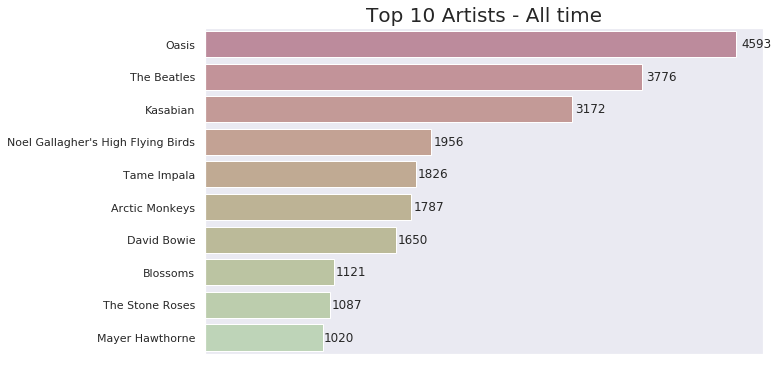

In [3]:
top_artists = Counter(tracks_df['Artist'])
top_100_artists = top_artists.most_common(100)

x_artists = [item[0] for item in top_100_artists]
y_artists = [item[1] for item in top_100_artists]

sns.set()
plt.subplots(figsize=(10, 6))
ch = sns.cubehelix_palette(n_colors=10, start=0.5, rot=1.8, light=0.8, dark=0.6, reverse=True)

artists_plot = sns.barplot(y_artists[:10], x_artists[:10], palette=ch)
artists_plot.axes.get_xaxis().set_visible(False)
artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
for p in artists_plot.patches:
    artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

    top_albums = Counter(tracks_df['Album'])

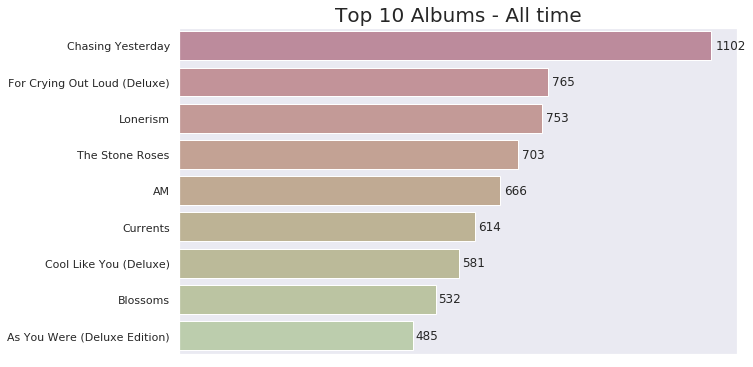

In [5]:
top_albums = Counter(tracks_df['Album'])
top_100_albums = top_albums.most_common(100)

x_albums = [item[0] for item in top_100_albums]
y_albums = [item[1] for item in top_100_albums]

plt.subplots(figsize=(10, 6))
albums_plot = sns.barplot(y_albums[:10], x_albums[:10], palette=ch)
albums_plot.axes.get_xaxis().set_visible(False)
albums_plot.set_title('Top 10 Albums - All time', fontsize=20)
for p in albums_plot.patches:
    albums_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

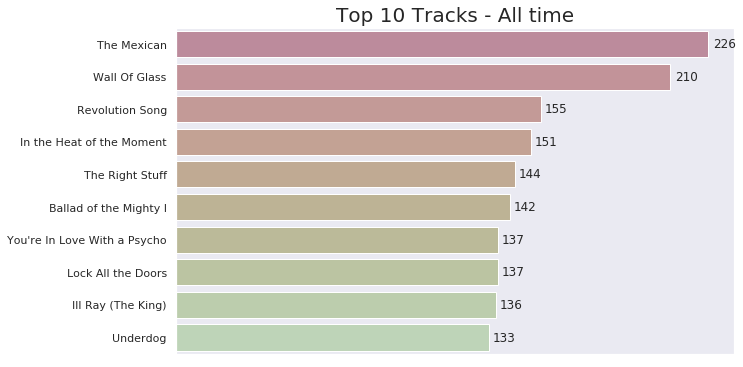

In [6]:
top_tracks = Counter(tracks_df['Track'])
top_100_tracks = top_tracks.most_common(100)

x_tracks = [item[0] for item in top_100_tracks]
y_tracks = [item[1] for item in top_100_tracks]

plt.subplots(figsize=(10, 6))
tracks_plot = sns.barplot(y_tracks[:10], x_tracks[:10], palette=ch)
tracks_plot.axes.get_xaxis().set_visible(False)
tracks_plot.set_title('Top 10 Tracks - All time', fontsize=20)
for p in tracks_plot.patches:
    tracks_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

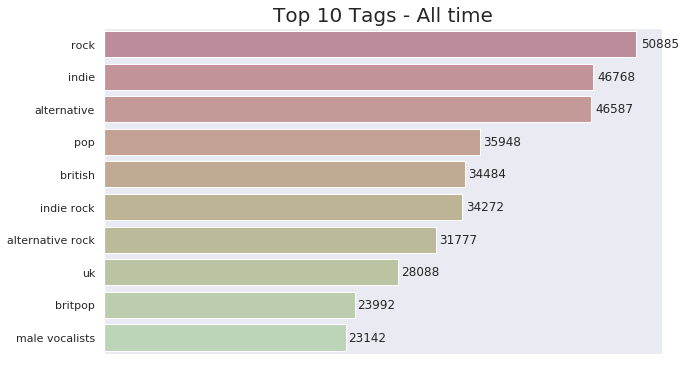

In [7]:
tags_df = tracks_df['Tags']
count_tags = {}

for i in range(len(tracks_df)):
    str1 = tags_df.iloc[i]
    str1 = str1.replace("[","").replace("]","").replace("'","")
    str1 = str1.split(", ")
    for j in range(len(str1)):
        if str1[j] not in count_tags:
            count_tags[str1[j]] = 1
        elif str1[j] in count_tags:
            count_tags[str1[j]] += 1
            
top_tags = Counter(count_tags)
top_100_tags = top_tags.most_common(100)

x_tags = [item[0] for item in top_100_tags]
y_tags = [item[1] for item in top_100_tags]

plt.subplots(figsize=(10, 6))
tags_plot = sns.barplot(y_tags[:10], x_tags[:10], palette=ch)
tags_plot.axes.get_xaxis().set_visible(False)
tags_plot.set_title('Top 10 Tags - All time', fontsize=20)
for p in tags_plot.patches:
    tags_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

## How obsessed am I?

Let's check the distribution of artists, albums and tracks, to see if I listen too much of one thing in regard os others.

We'll consider just the top 100 of each item, to keep the charts clean.

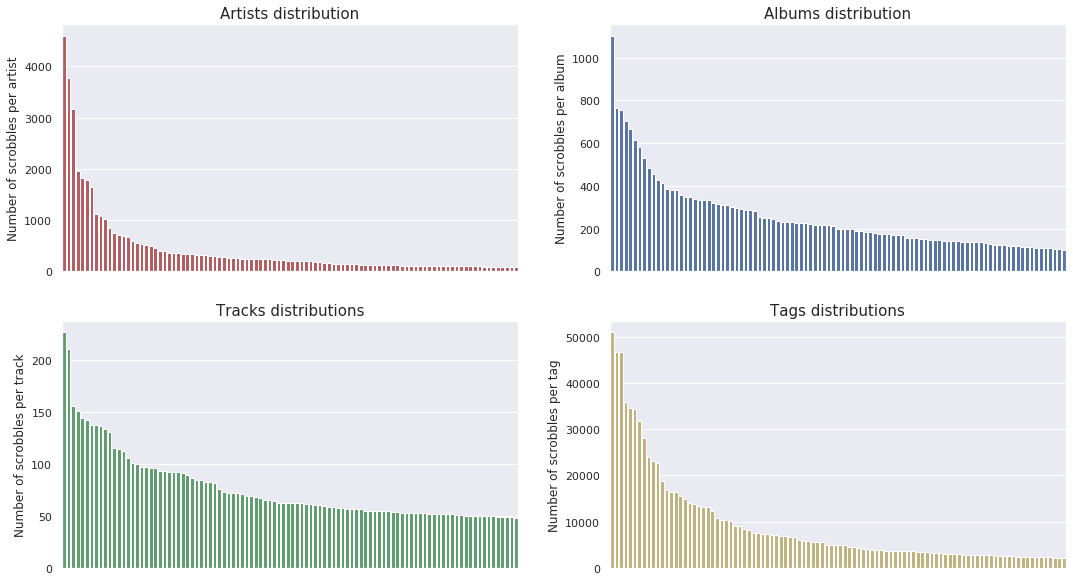

In [8]:
plt.subplots(figsize=(18, 10))

plt.subplot(2, 2, 1)
artists_dist = sns.barplot(x_artists, y_artists, color="r")
artists_dist.set_ylabel("Number of scrobbles per artist")
artists_dist.axes.get_xaxis().set_visible(False)
artists_dist.set_title('Artists distribution', fontsize=15)

plt.subplot(2, 2, 2)
albums_dist = sns.barplot(x_albums, y_albums, color="b")
albums_dist.set_ylabel("Number of scrobbles per album")
albums_dist.axes.get_xaxis().set_visible(False)
albums_dist.set_title('Albums distribution', fontsize=15)

plt.subplot(2, 2, 3)
tracks_dist = sns.barplot(x_tracks, y_tracks, color="g")
tracks_dist.set_ylabel("Number of scrobbles per track")
tracks_dist.axes.get_xaxis().set_visible(False)
tracks_dist.set_title('Tracks distributions', fontsize=15)

plt.subplot(2, 2, 4)
tags_dist = sns.barplot(x_tags, y_tags, color="y")
tags_dist.set_ylabel("Number of scrobbles per tag")
tags_dist.axes.get_xaxis().set_visible(False)
tags_dist.set_title('Tags distributions', fontsize=15)

plt.show()

So, I have a high concentration of artists and tags (the curves are more dramatic), however the distribution on albums and tracks are smoother. The albums and tracks are more evenly distributed however they are albums from the same artists. (To be studied)

Soundtrack for this first part of the study: [The Kinks](https://open.spotify.com/user/ohhrosie/playlist/4bW4B1ZAJL2QeVxjmz3K4K?si=gzblx6t9R8OMJL2wgttdjw)

<img src="https://www.rollingstone.com/wp-content/uploads/2018/10/the-kinks-1968-village-green-at-50.jpg?crop=900:600&width=440" width=30% height=30%>

### TO BE CONTINUED